# Lab exercise 1: Stochastic simulation and Monte Carlo

## Programming: Brownian motion

**Brownian motion** or **random walk** is the name of a type of random motion. Brownian motion
can be used in **Monte Carlo simulations** of a diverse set of phenomena, including particle (i.e. molecule) simulations
and simulations of the financial market.

#### Brief Introduction:

In the dice simulation-part of this lab, you worked with a simple Monte Carlo simulation. The ‘process’ in that case was not very complicated, but you can use the same reasoning to simulate complex stochastic processes arising in other problem settings. Here, we will use a stochastic model to simulate how a large particle moves in an
environment of small molecules. The stochastic process here is the so called Brownian motion.

#### Tasks:

a) In the cell below you will find the function `BrownMotion`. To get a feeling for the process, call the function a few times with initial point $(0, 0)$ and end time 1s. Vary the time step $h$ (try for example $0.1$, $0.01$ and $0.001$). Plot the trajectory in 2D. Run multiple different simulations with the same parameters and observe the variation in the generated trajectory. Read the comments in the function to understand how it is used, and how to plot the trajectories in 2D.


In [1]:
%matplotlib widget
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def BrownMotion(initial_pos, end_time, time_step):
    """n-dimensional brownian motion (also called Wiener process).

    Input:  initial_pos - initial point, for example np.zeros([dim,1]) 
            end_time    - the final time in seconds
            time_step   - time step
    Output: X           - the trajectory. The first column, X[0,:], corresponds to
                          initial position, 2nd column, X[1, :] to the second position, and so forth.             
    """
    initial_pos = np.array(initial_pos)

    X = initial_pos
    n, m = initial_pos.shape
    k = 0
    while k*time_step <= end_time:
        chance = np.sqrt(time_step)*np.random.normal(0,1,n)
        new_pos = X[:,-1] + chance 
        X = np.column_stack((X,new_pos)) 
        k += 1
    return X

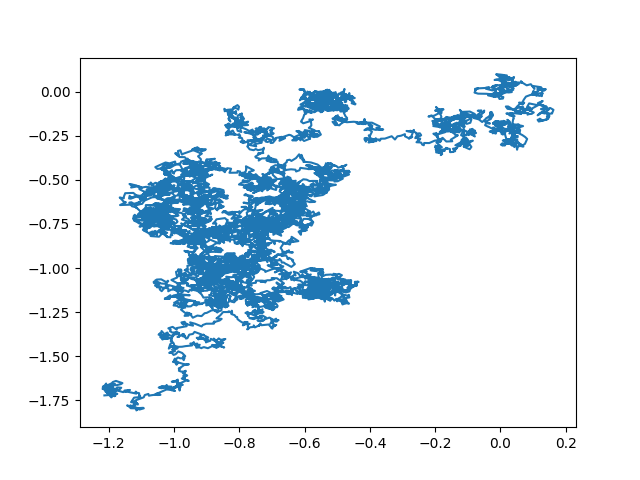

In [3]:
# enter your code here
X = BrownMotion(np.zeros([2, 1]), 1, 0.0001)

#    To plot the trajectory in 2D, you can use:
fig1, ax1 = plt.subplots()
ax1.plot(X[0,:], X[1,:])

b) Run the simulation in 3D and plot the resulting 3D-trajectory. Run multiple different simulations and observe the variations in the generated trajectory. Hint: Sometimes the default viewing angle is not optimal. In this case, we can use the `view_init` method to rotate the 3D-plot. For example, you can use the command `ax.view_init(35, 35)` to set an elevation of 35 degrees and an azimuth of 35 degrees.

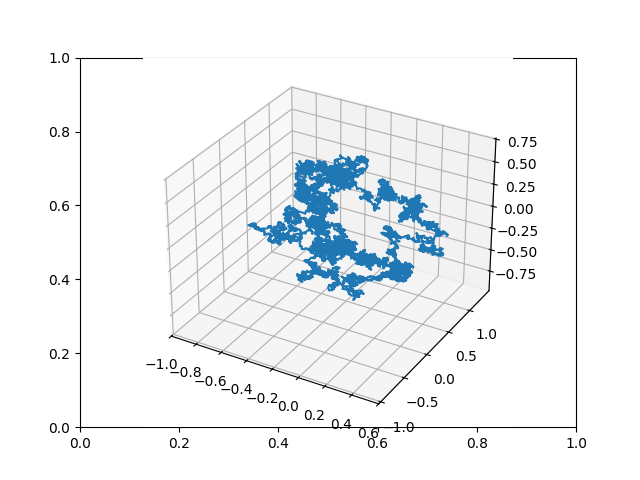

In [4]:
# enter your code here
X = BrownMotion(np.zeros([3, 1]), 1, 0.0001)

#    To plot the trajectory in 3D, you can use:
fig2, ax2 = plt.subplots()
ax2 = plt.axes(projection='3d')
ax2.plot3D(X[0,:], X[1,:], X[2,:])


c) As you have seen, each new call to brown generates a different trajectory. We now want to
study the behavior of particles described by the process simulated by the function brown. On average,
how far from the origin will such a particle be located after t = 1s? We can try to find that
out by generating many trajectories and calculating the mean distance. That simulation will
be a Monte Carlo simulation. Write a code that achieves this, calling the function brown.

The general algorithm for a Monte Carlo simulation is:

    for i = 1:N
       Simulate one stochastic process. Store in vector.
    end
    Compute the mean of the vector.

In this particular case, the stochastic process is to simulate the distance between the starting
point and the end point of the particle trajectory. To compute such a distance, you can use the command `numpy.linalg.norm(X[:,-1] - X[:,0])`, where `X[:,-1]` is the end point and `X[:,0]` is the starting point of the trajectory.

In [12]:
# write your Monte Carlo simulation here

def particle_sim(starting_point, end_time, time_step, N):
    dist = np.zeros(N)
    for i in range(N):
        X = BrownMotion(starting_point, end_time, time_step)
        dist[i] = np.linalg.norm(X[:,-1] - X[:,0])
    return dist

dists = particle_sim(np.zeros([1,1]), 1, 0.001, 10**4)

d) If you have time, try to estimate and look at the distribution of the mean (or expected value)
using a histogram in the same way as you did in the dice-simulation part of this lab exercise.
Run many Monte Carlo simulations, i.e. run the algorithm above many times, and
save all mean-values in a vector. Plot all mean-values in a histogram using the command
`plt.hist(mean_vector, bins=30)`.

(array([1.070e+03, 1.016e+03, 9.230e+02, 9.210e+02, 8.160e+02, 7.800e+02,
        7.250e+02, 6.530e+02, 5.550e+02, 4.780e+02, 3.900e+02, 3.670e+02,
        2.760e+02, 2.240e+02, 2.060e+02, 1.470e+02, 1.240e+02, 8.000e+01,
        6.400e+01, 5.900e+01, 3.900e+01, 3.300e+01, 1.900e+01, 9.000e+00,
        1.100e+01, 6.000e+00, 3.000e+00, 3.000e+00, 1.000e+00, 2.000e+00]),
 array([2.67711805e-04, 1.25145137e-01, 2.50022563e-01, 3.74899989e-01,
        4.99777414e-01, 6.24654840e-01, 7.49532266e-01, 8.74409691e-01,
        9.99287117e-01, 1.12416454e+00, 1.24904197e+00, 1.37391939e+00,
        1.49879682e+00, 1.62367424e+00, 1.74855167e+00, 1.87342910e+00,
        1.99830652e+00, 2.12318395e+00, 2.24806137e+00, 2.37293880e+00,
        2.49781622e+00, 2.62269365e+00, 2.74757108e+00, 2.87244850e+00,
        2.99732593e+00, 3.12220335e+00, 3.24708078e+00, 3.37195820e+00,
        3.49683563e+00, 3.62171305e+00, 3.74659048e+00]),
 <BarContainer object of 30 artists>)

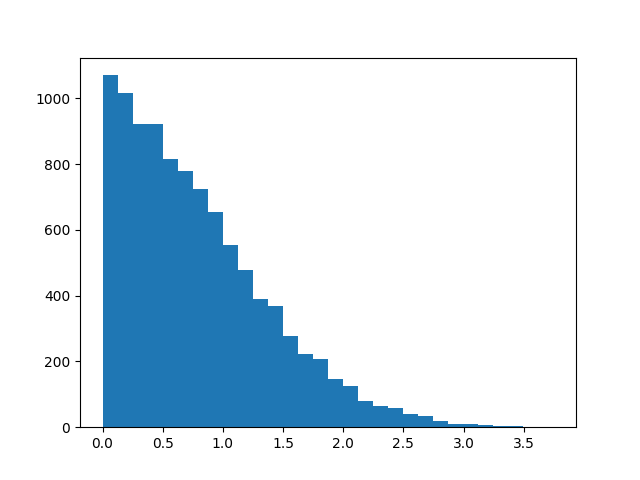

In [13]:
# enter your code here
fig3, ax3 = plt.subplots()
ax3.hist(dists, bins=30)

_**To think about:**_  
*  If you did the last part (the histogram), what distribution will
you approach when using many mean-values?
* Would it be much more complicated to compute the distance
of a particle moving in 10D? You do not need to grasp what a
10D motion means in reality, but with a more complicated
model, each dimension could be the price of a share in an
equity portfolio instead of the position of a particle (and an
equity portfolio with 10 shares is not unusual).

Normal distribution

No you can still just take the norm of a 10D vector the formula has a few more terms so it is a bit more computations but not more complicated